# Projet 6 - Feature text

# Import des librairies et des données

In [1]:
!pip install pandas matplotlib numpy seaborn scikit-learn missingno plotly nltk string
!pip freeze > requirements.txt

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
import plotly.express as px
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Vérifier les versions des packages
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.3.3
NumPy version: 2.3.5
Seaborn version: 0.13.2


In [3]:
# Téléchargements nécessaires (à exécuter une seule fois)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jean-baptistevayssade/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')
df = data.copy()
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
690,cdc33ed715261b08e315a2a19427bc23,2015-12-31 09:19:31 +0000,http://www.flipkart.com/oriflame-sweden-sun-zo...,Oriflame Sweden Sun Zone UV Protector Face and...,"[""Beauty and Personal Care >> Body and Skin Ca...",SNREDXF5HUYHXT7H,799.0,579.0,cdc33ed715261b08e315a2a19427bc23.jpg,False,Flipkart.com: Buy Oriflame Sweden Sun Zone UV ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",..."
79,320833ab08c9a94ef83520612899a85f,2016-05-22 16:29:40 +0000,http://www.flipkart.com/florence9-baby-cap-red...,florence9 baby cap red checks Cap,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",CAPEGW7UTGHRJBEW,800.0,399.0,320833ab08c9a94ef83520612899a85f.jpg,False,Key Features of florence9 baby cap red checks ...,No rating available,No rating available,florence9,"{""product_specification""=>[{""key""=>""Number of ..."
1041,b1644f47c7dfa58f8c06677f2a27ee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UFETEGPVY,1839.0,1216.0,b1644f47c7dfa58f8c06677f2a27ee09.jpg,False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
370,b42a9b597a3a3dc8f428e2e2323e9aff,2015-12-01 06:13:00 +0000,http://www.flipkart.com/anna-andre-paris-flora...,Anna Andre Paris Floralina & Red Horizon Combo...,"[""Beauty and Personal Care >> Fragrances >> De...",CAGDTN27DEWJYUHK,355.0,249.0,b42a9b597a3a3dc8f428e2e2323e9aff.jpg,False,Flipkart.com: Buy Anna Andre Paris Floralina &...,4,4,NaN,"{""product_specification""=>[{""key""=>""Number of ..."


On va garder principalement la description et le product_category_tree

# Analyse exploratoire

In [5]:
# Shape du dataframe
print("La shape du DataFrame est :")
print(df.shape)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\n" + "-"*50 + "\n")

# Informations générales sur le DataFrame
print("Informations générales sur le DataFrame :")
print(df.info())

La shape du DataFrame est :
(1050, 15)
Nombre de lignes : 1050
Nombre de colonnes : 15

--------------------------------------------------

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  prod

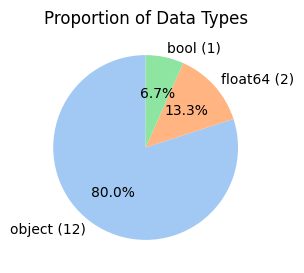

object     12
float64     2
bool        1
Name: count, dtype: int64


In [6]:
# Pie Chart of Data Types
plt.figure(figsize=(3, 3))
df.dtypes.value_counts().plot(kind='pie', labels = [f"{dtype} ({count})" for dtype, count in zip (df.dtypes.value_counts().index, df.dtypes.value_counts().values) ],
                                                    autopct='%1.1f%%', 
                                                    startangle=90, 
                                                    colors=sns.color_palette("pastel"))
#value counts permet de compter le type de variable contenu dans chaque colonne
plt.title("Proportion of Data Types")
plt.ylabel("")  # On cache le label de y-axis
plt.show()
print(df.dtypes.value_counts())

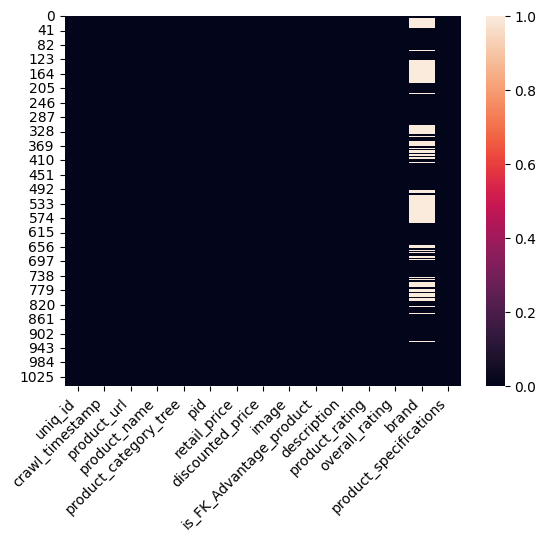

In [7]:
#Visualisation des valeurs manquantes sous forme de heatmap

sns.heatmap(df.isna())
plt.xticks(rotation=45, ha='right'); #Ajouter ; me permet de ne pas avoir les infos de type (array([...]), [...]) devant mon graphe
plt.show()

In [8]:
#Affichage du pourcentage de valeurs manquantes sous forme textuelle

list_variable = ['brand']
for name_variable in list_variable:
    print(f"Le pourcentage de valeurs manquantes de {name_variable} est {df[name_variable].isna().sum()/df.shape[0]*100:.2f} %")

Le pourcentage de valeurs manquantes de brand est 32.19 %


# Prétraitement des données

- Nettoyage textes (lowercase, suppression ponctuation, tokenisation, stop-words, lemmatisation/stemming si pertinent).
- Vérification corrélations champ manquant / duplicatas / images corrompues.
- Standardisation images (resize, normalisation pixel, vérification ratio / orientation).

On traitera les images dans un deuxième temps

## Nettoyage du texte avec une regex

In [9]:
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
183,3830dda3491cd5b28ed42ae544bc44f0,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-blue-water-...,Rockmantra Blue Water Abstracts Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKDCJHRYBY,499.0,199.0,3830dda3491cd5b28ed42ae544bc44f0.jpg,False,Rockmantra Blue Water Abstracts Ceramic Mug (5...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
892,6858fd9265d348803b18667fe43cd054,2015-12-20 08:26:17 +0000,http://www.flipkart.com/mb-cotton-set-towels/p...,MB Cotton Set of Towels,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWEYFA942QUCJ6Q,1495.0,1195.0,6858fd9265d348803b18667fe43cd054.jpg,False,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,3.5,3.5,MB,"{""product_specification""=>[{""key""=>""Material"",..."


In [10]:
pd.set_option('display.max_colwidth', None)   # Do not truncate column text
pd.set_option('display.width', None)          # Let output use full notebook width

print(df['product_category_tree'].sample(10))

pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')


444                                          ["Home Furnishing >> Bed Linen >> Bedsheets >> JBC Collection Bedsheets >> JBC Collection Cotton Printed Single Bedsheet (1..."]
237                                                                                               ["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]
590            ["Baby Care >> Infant Wear >> Baby Girls' Clothes >> Leggings & Jeggings >> Babyoye Premium Leggings & Jeggings >> Babyoye Premium Baby Girl's Grey Leggings"]
660                                                                                                                 ["Home Furnishing >> Curtains & Accessories >> Curtains"]
669                                                                                ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Shrikant Traders Baby Bath Towels"]
202                                                     ["Baby Care >> Infant Wear >> Baby Boys' Clothes >> Dungarees & Jumpsuits 

On crée une colonne catégorie, qui correspondra à la colonne product_category_tree nettoyée, dans laquelle on a gardé seulement le premier mot clé.

In [11]:
df['categorie'] = df['product_category_tree'].str.replace(r'^\s*\[\s*"', '', regex=True).str.split('>>').str[0].str.strip()
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie
645,31376e77d4621c06a45440d42b9fe2ac,2016-04-29 11:45:32 +0000,http://www.flipkart.com/needybee-baby-girl-s-l...,NeedyBee Baby Girl's Layered Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEGYPSYD23Y8CV,1600.0,1600.0,31376e77d4621c06a45440d42b9fe2ac.jpg,False,Specifications of NeedyBee Baby Girl's Layered...,No rating available,No rating available,NeedyBee,"{""product_specification""=>[{""value""=>""1 Dress""...",Baby Care
144,3847353a4b8de1efc504d589aea74ffe,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-tele-phoner...,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKUQE2HYPZ,499.0,199.0,3847353a4b8de1efc504d589aea74ffe.jpg,False,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining
1000,4cc971d2c9c0f1056bc124031ed52c1e,2016-06-23 02:25:03 +0000,http://www.flipkart.com/lock-lock-kitchen-5-5-...,Lock&Lock Kitchen - 5.5 L Polypropylene Multi...,"[""Kitchen & Dining >> Containers & Bottles >> ...",CNTEJVGGPSZRZDFH,2145.0,2145.0,4cc971d2c9c0f1056bc124031ed52c1e.jpg,False,Key Features of Lock&Lock Kitchen - 5.5 L Pol...,No rating available,No rating available,Lock&Lock,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Kitchen & Dining


On va commencer par faire le lemming, stemming, et tokenizing

## Nettoyage du texte avec Stemming, Lemming et Tokenisation

Tokenising : découper la phrase en mots (tokens). On transforme la phrase en liste de mots.

Stemming : couper les mots pour garder la racine brute (ex. manger → mang), simple et rapide, parfois violent.

Lemmatisation : ramener au lemme réel (ex. mangé → manger), plus sémantique mais nécessite un modèle linguistique.

Key differences:

Stemming: Fast but crude - just chops off endings ("running" → "run", "beautiful" → "beauti")
Lemmatization: Slower but accurate - uses vocabulary and morphology ("running" → "run", "beautiful" → "beautiful")

In practice: You'd choose stemming for speed (search engines) or lemmatization for accuracy (sentiment analysis, classification). The typical pipeline is: tokenize → remove stopwords → stem/lemmatize → further processing.

In [12]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopword_set = set(stopwords.words('english'))

def process_text_en(text):

    tokens = word_tokenize(text.lower())
    processed_tokens = []

    for tok in tokens:
        # 4) Lemmatization
        lemma = lemmatizer.lemmatize(tok)
        processed_tokens.append(lemma)
        
    return processed_tokens

# Application sur la colonne
df['description_cleaned'] = df['description'].apply(process_text_en)
df.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie,description_cleaned
577,059bc43e03e1824a9ab6466e32e5f137,2016-01-07 05:50:25 +0000,http://www.flipkart.com/maxima-05712lmly-analo...,Maxima 05712LMLY Analog Watch - For Women,"[""Watches >> Wrist Watches >> Maxima Wrist Wat...",WATE26J7DTHUYJN8,925.0,925.0,059bc43e03e1824a9ab6466e32e5f137.jpg,True,Maxima 05712LMLY Analog Watch - For Women - B...,4.7,4.7,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Watches,"[maximum, 05712lmly, analog, watch, -, for, wo..."
993,c4ac93e194281d6d1450ffdaa52f5f99,2015-12-03 13:48:35 +0000,http://www.flipkart.com/shop-rajasthan-cotton-...,Shop Rajasthan Cotton Floral Single Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets""]",BDSE6WKCFTWQZAKF,799.0,199.0,c4ac93e194281d6d1450ffdaa52f5f99.jpg,False,Buy Shop Rajasthan Cotton Floral Single Bedshe...,No rating available,No rating available,Shop Rajasthan,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,"[buy, shop, rajasthan, cotton, floral, single,..."
415,b17d093c269db6ad3bf4b6076461fd72,2015-12-01 06:13:00 +0000,http://www.flipkart.com/ajmal-titanium-expedit...,Ajmal Titanium and Expedition Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGEB9ZQYPWX2F9D,410.0,400.0,b17d093c269db6ad3bf4b6076461fd72.jpg,False,Flipkart.com: Buy Ajmal Titanium and Expeditio...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,"[flipkart.com, :, buy, ajmal, titanium, and, e..."


In [13]:
df['description_cleaned'][0]

['key',
 'feature',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 ',',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '(',
 '213',
 'cm',
 'in',
 'height',
 ',',
 'pack',
 'of',
 '2',
 ')',
 'price',
 ':',
 'r',
 '.',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.it',
 'feature',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring.it',
 'make',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.this',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'design',
 '.',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'heart',
 '.',
 'these

# Extraction de features

In [14]:
docs = [
    "chat chat chien",
    "chat souris",
    "chien souris",
    "chien souris chien"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['chat' 'chien' 'souris']
[[0.92693676 0.3752176  0.        ]
 [0.77722116 0.         0.62922751]
 [0.         0.70710678 0.70710678]
 [0.         0.89442719 0.4472136 ]]


In [15]:
list_description = df['description_cleaned'].to_list()
list_description

[['key',
  'feature',
  'of',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  ',',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '(',
  '213',
  'cm',
  'in',
  'height',
  ',',
  'pack',
  'of',
  '2',
  ')',
  'price',
  ':',
  'r',
  '.',
  '899',
  'this',
  'curtain',
  'enhances',
  'the',
  'look',
  'of',
  'the',
  'interiors.this',
  'curtain',
  'is',
  'made',
  'from',
  '100',
  '%',
  'high',
  'quality',
  'polyester',
  'fabric.it',
  'feature',
  'an',
  'eyelet',
  'style',
  'stitch',
  'with',
  'metal',
  'ring.it',
  'make',
  'the',
  'room',
  'environment',
  'romantic',
  'and',
  'loving.this',
  'curtain',
  'is',
  'ant-',
  'wrinkle',
  'and',
  'anti',
  'shrinkage',
  'and',
  'have',
  'elegant',
  'apparance.give',
  'your',
  'home',
  'a',
  'bright',
  'and',
  'modernistic',
  'appeal',
  'with',
  'these',
  'design',
  '.',


In [16]:
list_description_str = [' '.join(tokens) for tokens in list_description]


In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_description_str)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['00' '000' '001' ... 'zoom' 'zora' 'zyxel']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(f'le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : {X.shape[0]}')

le nombre de colonnes, qui est aussi le nombre de mots uniques, est de : 1050


In [19]:
list_words = list(vectorizer.get_feature_names_out())

In [20]:
print(list_words)

['00', '000', '001', '0021', '004', '005', '006', '0083', '01', '011', '01433cmgy', '01727lpln', '01741lpln', '01784bmly', '02', '03', '03918cmly', '04', '04615cmgy', '050', '052', '05712lmly', '05tg', '06', '063', '06362cmgy', '064', '069', '07', '07034lmli', '074', '08', '085', '09', '09321cmgy', '099', '10', '100', '1000', '1001', '10024982', '1008ax', '101', '1010', '1014tx', '1015', '1015nr', '101b0101', '1020el', '1033', '1038', '104', '1042', '1045', '1049', '105key', '107', '1071', '1075', '107750', '108', '1080', '1085', '10890', '1092', '1099', '109b0109', '10btsc2012gb', '11', '110', '1100', '11000026', '111', '112', '1132', '1141ym22', '1142301', '1143', '1148', '1149', '1150', '1153', '1155', '1170', '1183', '119', '1195', '1199', '11n', '11oz', '12', '120', '1200', '12011ppgw', '121', '1216', '122', '1234', '12399', '1240sg', '1241ea', '125', '125g', '125prog', '126', '129', '1290', '1295', '1299', '12v', '12x12', '12x18', '13', '130', '132', '1333', '13400', '1345', '134

In [21]:
list_words.index('curtain')

1830

In [22]:
#X.sample(3)

In [23]:
df_tfifd_features = pd.DataFrame(X.toarray())
df_tfifd_features[1678]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: 1678, Length: 1050, dtype: float64

In [24]:
df.head(1)['description_cleaned'].to_list()

[['key',
  'feature',
  'of',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  ',',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '(',
  '213',
  'cm',
  'in',
  'height',
  ',',
  'pack',
  'of',
  '2',
  ')',
  'price',
  ':',
  'r',
  '.',
  '899',
  'this',
  'curtain',
  'enhances',
  'the',
  'look',
  'of',
  'the',
  'interiors.this',
  'curtain',
  'is',
  'made',
  'from',
  '100',
  '%',
  'high',
  'quality',
  'polyester',
  'fabric.it',
  'feature',
  'an',
  'eyelet',
  'style',
  'stitch',
  'with',
  'metal',
  'ring.it',
  'make',
  'the',
  'room',
  'environment',
  'romantic',
  'and',
  'loving.this',
  'curtain',
  'is',
  'ant-',
  'wrinkle',
  'and',
  'anti',
  'shrinkage',
  'and',
  'have',
  'elegant',
  'apparance.give',
  'your',
  'home',
  'a',
  'bright',
  'and',
  'modernistic',
  'appeal',
  'with',
  'these',
  'design',
  '.',


Je fais un sanity check pour vérifier que tout est bon

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Sample text
text = "The runners were running quickly through the beautiful gardens, carrying heavy boxes."

print("Original text:", text)
print("\n" + "="*60 + "\n")

# Step 1: TOKENIZATION - Split text into individual words
tokens = word_tokenize(text.lower())
print("1. TOKENIZATION:")
print(tokens)
print("\n" + "="*60 + "\n")

# Step 2a: STEMMING - Crude chopping to get word root
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]
print("2a. STEMMING (Porter Stemmer):")
print(stemmed_words)
print("\nExamples:")
print(f"  running → {stemmer.stem('running')}")
print(f"  runner → {stemmer.stem('runner')}")
print(f"  beautiful → {stemmer.stem('beautiful')}")
print("\n" + "="*60 + "\n")

# Step 2b: LEMMATIZATION - Intelligent reduction to dictionary form
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
print("2b. LEMMATIZATION:")
print(lemmatized_words)
print("\nExamples:")
print(f"  running → {lemmatizer.lemmatize('running', pos='v')}")
print(f"  runner → {lemmatizer.lemmatize('runner', pos='n')}")
print(f"  beautiful → {lemmatizer.lemmatize('beautiful', pos='a')}")
print("\n" + "="*60 + "\n")

# COMPARISON TABLE
print("COMPARISON - Stemming vs Lemmatization:")
print(f"{'Word':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("-" * 45)
for token in tokens:
    if token.isalpha():  # Only process words
        stemmed = stemmer.stem(token)
        lemmatized = lemmatizer.lemmatize(token, pos='v')
        print(f"{token:<15} {stemmed:<15} {lemmatized:<15}")

Original text: The runners were running quickly through the beautiful gardens, carrying heavy boxes.


1. TOKENIZATION:
['the', 'runners', 'were', 'running', 'quickly', 'through', 'the', 'beautiful', 'gardens', ',', 'carrying', 'heavy', 'boxes', '.']


2a. STEMMING (Porter Stemmer):
['the', 'runner', 'were', 'run', 'quickli', 'through', 'the', 'beauti', 'garden', ',', 'carri', 'heavi', 'box', '.']

Examples:
  running → run
  runner → runner
  beautiful → beauti


2b. LEMMATIZATION:
['the', 'runners', 'be', 'run', 'quickly', 'through', 'the', 'beautiful', 'garden', ',', 'carry', 'heavy', 'box', '.']

Examples:
  running → run
  runner → runner
  beautiful → beautiful


COMPARISON - Stemming vs Lemmatization:
Word            Stemmed         Lemmatized     
---------------------------------------------
the             the             the            
runners         runner          runners        
were            were            be             
running         run             run         

[nltk_data] Downloading package punkt to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jean-baptistevayssade/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/jean-
[nltk_data]     baptistevayssade/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
